# **Results**

### Basic setup:

In [2]:
# magics
%load_ext autoreload
%reload_ext autoreload

%autoreload 2

# load general packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load modules
from model_vfi import model_bufferstock

In [3]:
model = model_bufferstock()

In [4]:
sol = model.sol
par = model.par
aux = model.aux



In [6]:
model.setup()

par.T = 40
par.N = 40              # Number of points in grids
par.w_old_max = 3.0     # Maximum cash on hand
par.d_old_max = 0.74    # Maximum total debt
par.rho = 3
par.credit_con = 0.10

model.create_grids()
model.allocate()
model.create_grids()

model.solve()

T ===========  39
T ===========  38
T ===========  37
T ===========  36
T ===========  35
T ===========  34
T ===========  33
T ===========  32
T ===========  31
T ===========  30
T ===========  29
T ===========  28
T ===========  27
T ===========  26
T ===========  25
T ===========  24
T ===========  23
T ===========  22
T ===========  21
T ===========  20
T ===========  19
T ===========  18
T ===========  17
T ===========  16
T ===========  15
T ===========  14
T ===========  13
T ===========  12
T ===========  11
T ===========  10
T ===========  9
T ===========  8
T ===========  7
T ===========  6
T ===========  5
T ===========  4
T ===========  3
T ===========  2
T ===========  1
T ===========  0


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

netto_assets = False


fig = plt.figure(figsize=(12, 4))

sol.grid_n = np.zeros((par.T, par.N))


def update_plot(t):
    # Create a figure and a 3D subplot

    sol.grid_n[t,:] = np.zeros(par.N)
    sol.grid_n[t,:] = sol.grid_w_old[t,:] - 0.74

    if netto_assets == True:
        x_axis = sol.grid_n[t,:]
        x_label_name = "n"

    else:
        x_axis = sol.grid_w_old[t,:]
        x_label_name = r'$w_{t-1}$'
     


    fig = plt.figure(figsize=(20, 7))
    ax1 = fig.add_subplot(131, projection='3d')

    # Create grid coordinates from x and y
    w_old, d_old = np.meshgrid(x_axis, sol.grid_d_old[t, :])

    # Plot the surface
    ax1.plot_surface(w_old, d_old, sol.c[t, :, :, unemployment], cmap='viridis')

    # Invert the x-axis
    ax1.set_xlim(ax1.get_xlim()[::-1])
    ax1.set_ylim(ax1.get_ylim()[::-1])

    # Set labels and title
    ax1.set_xlabel(x_label_name,
          fontsize = 15)
    ax1.set_ylabel(r'$d_{t-1}$',
          fontsize = 15)
    ax1.set_zlabel(r'$c_{t}$',
          fontsize = 15)
    ax1.set_title('Consumption',
          fontsize = 20)



    ax2 = fig.add_subplot(132, projection='3d')

    w_old, d_old = np.meshgrid(x_axis, sol.grid_d_old[t, :])

    ax2.plot_surface(w_old, d_old, sol.v[t, :, :, unemployment], cmap='viridis')

    ax2.set_xlim(ax2.get_xlim()[::-1])
    ax2.set_ylim(ax2.get_ylim()[::-1])

    ax2.set_xlabel(x_label_name,
          fontsize = 15)
    ax2.set_ylabel(r'$d_{t-1}$',
          fontsize = 15)
    ax2.set_zlabel(r'$v_{t}$',
          fontsize = 15)
    ax2.set_title('Utility',
          fontsize = 20)



    ax3 = fig.add_subplot(133, projection='3d')

    w_old, d_old = np.meshgrid(sol.grid_w_old[t,:], sol.grid_d_old[t, :])

    ax3.plot_surface(w_old, d_old, sol.d[t, :, :, unemployment], cmap='viridis')

    # ax3.set_xlim(ax3.get_xlim()[::-1])
    # ax3.set_ylim(ax3.get_ylim()[::-1])

    ax3.set_xlabel(x_label_name,
          fontsize = 15)
    ax3.set_ylabel(r'$d_{t-1}$',
          fontsize = 15)
    ax3.set_zlabel(r'$d_{t}$',
          fontsize = 15)
    ax3.set_title('Debt',
          fontsize = 20)

    plt.subplots_adjust(wspace=0.2)


    plt.show()

unemployment = 0

# Create the interactive slider
interact(update_plot, t=(0, par.T-1, 1))

<Figure size 864x288 with 0 Axes>

interactive(children=(IntSlider(value=19, description='t', max=39), Output()), _dom_classes=('widget-interact'…

<function __main__.update_plot(t)>

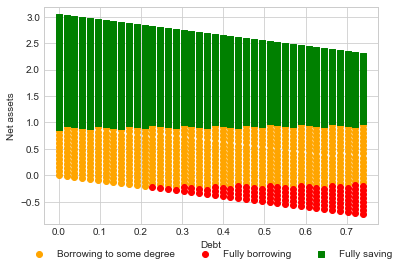

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

t = 1

# Your data here
x = sol.grid_d_old[t,:]
y = sol.grid_w_old[t,:]
z = sol.d[t,:,:, unemployment]

z.flatten()

x_new = []
y_new = []
z_new = []

for i in range(len(x)):
    for j in range(len(y)):
        x_new.append(x[i])
        y_new.append(y[j])
        if z[i,j] > 0.73:
            z_new.append("Fully borrowing")
        elif  0.01 < z[i,j] < 0.73:
            z_new.append("Borrowing to some degree")
        else:
            z_new.append("Fully saving")

df = pd.DataFrame({
    'x': x_new,
    'y': y_new,
    'category': z_new
})

df['net_assets'] = df['y'] - df['x']


# Define colors and markers for each category
colors = {'Fully borrowing': 'red', 'Borrowing to some degree': 'orange', 'Fully saving': 'green'}
markers = {'Fully borrowing': 'o', 'Borrowing to some degree': 'o', 'Fully saving': 's'}

# Plot scatter plot with grouped legend
for category, group in df.groupby('category'):
    plt.scatter(group['x'], group['net_assets'], color=colors[category], marker=markers[category], label=category)

# Add legend
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Add labels and title
plt.xlabel('Debt')
plt.ylabel('Net assets')


# Show the plot
plt.show()



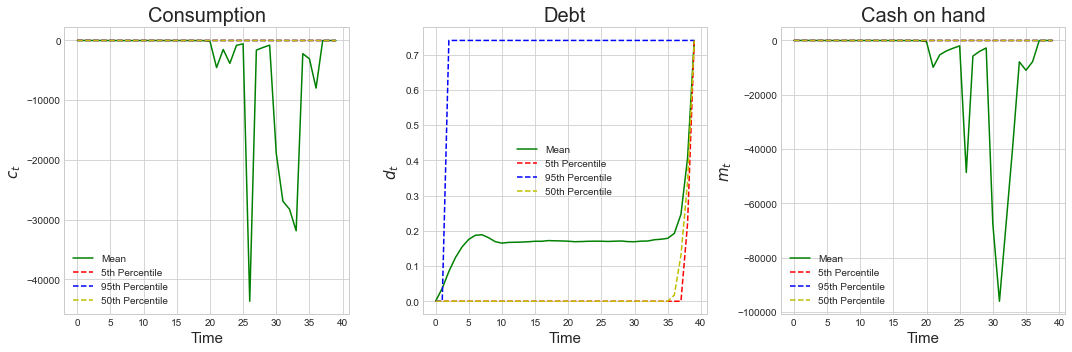

In [67]:
import tools
from numpy import random

import tools
from numpy import random

def select_last_percentage(array, prob):

    num_observations = int(len(array) * prob)  # Calculate the number of observations for 5%

    if num_observations == 0:
        selected_elements = np.array([])

    else:
        selected_elements = array[:num_observations]  # Slice the last 5% of observations
    
    return selected_elements

class sim: pass


np.random.seed(1234)

par.simN = 100000
par.m_ini = 2
par.d_ini = 0.74

shape = (par.T, par.simN)

sim.d = np.nan +np.zeros(shape)
sim.c = np.nan +np.zeros(shape)

sim.m = par.m_ini + np.zeros(shape)
sim.w_old = np.zeros(shape)
sim.d_old = par.d_ini + np.zeros(shape)

par.Nshocks = par.w.size
shocki = np.random.choice(par.Nshocks,(shape),replace=True,p=par.w) #draw values between 0 and Nshocks-1, with probability w
sim.psi = par.psi_vec[shocki] #Draw shocks from quadrature points
sim.xi = par.xi_vec[shocki] #Draw shocks from quadrature points

for t in range(par.T):


    #If credit constrained
    sim.c[t,:] = tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.c[t,:,:, 1], sim.d_old[t,:], sim.m[t,:])
    sim.d[t,:] = np.clip(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.d[t,:,:, 1], sim.d_old[t,:], sim.m[t,:]), a_min = 0, a_max=0.74)

    if t < par.T-1:
        
        sim.d_old[t+1,:] = np.minimum((1-par.lambdaa)*sim.d_old[t,:], sim.d[t,:])

        sim.w_old[t,:] = sim.m[t,:]
        m = ((1 + par.r_w) * sim.w_old[t,:] - (par.r_d + par.lambdaa) * sim.d_old[t,:] + par.Gamma*sim.psi[t]*sim.xi[t]) / (par.Gamma*sim.xi[t])
        sim.w_old[t+1,:] = m + (sim.d_old[t+1,:] - (1 - par.lambdaa) * sim.d_old[t,:] - sim.c[t,:]) / (par.Gamma*sim.xi[t])
        sim.m[t+1,:] = (1 + par.r_w) * sim.w_old[t+1,:] + (par.Gamma*sim.psi[t]*sim.xi[t]) / (par.Gamma*sim.xi[t]) - ((par.r_d + par.lambdaa) * sim.d[t,:]) / (par.Gamma*sim.xi[t])


        last_five = select_last_percentage(sim.m[t+1,:], par.credit_con)
        last_five_debt = select_last_percentage(sim.d_old[t+1,:], par.credit_con)
        

    #If not credit constrained
    sim.c[t,:] = tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.c[t,:,:, 0], sim.d_old[t,:], sim.m[t,:])
    sim.d[t,:] = np.clip(tools.interp_2d_vec(sol.grid_d_old[t,:], sol.grid_w_old[t,:], sol.d[t,:,:,0], sim.d_old[t,:], sim.m[t,:]), a_min = 0, a_max=0.74)

    if t < par.T-1:
        
        sim.d_old[t+1,:] = np.clip(sim.d[t,:], a_min = 0, a_max = 0.74) 

        sim.w_old[t,:] = sim.m[t,:]
        m = ((1 + par.r_w) * sim.w_old[t,:] - (par.r_d + par.lambdaa) * sim.d_old[t,:] + par.Gamma*sim.psi[t]*sim.xi[t]) / (par.Gamma*sim.xi[t])
        sim.w_old[t+1,:] = m + (sim.d_old[t+1,:] - (1 - par.lambdaa) * sim.d_old[t,:] - sim.c[t,:]) / (par.Gamma*sim.xi[t])
        sim.m[t+1,:] = (1 + par.r_w) * sim.w_old[t+1,:] + (par.Gamma*sim.psi[t]*sim.xi[t]) / (par.Gamma*sim.xi[t]) - ((par.r_d + par.lambdaa) * sim.d[t,:]) / (par.Gamma*sim.xi[t])

        first_ninetyfive = sim.m[t+1,:-len(last_five)].copy()
        first_ninetyfive_debt = sim.d_old[t+1,:-len(last_five_debt)].copy()
        
        collected = np.array(np.concatenate((last_five, first_ninetyfive)))

        np.random.shuffle(collected)

        sim.m[t+1,:] = collected

        collected_debt = np.array(np.concatenate((last_five_debt, first_ninetyfive_debt)))
        np.random.shuffle(collected_debt)

        sim.d_old[t+1,:] = collected_debt


def mean_graph(data, y_value, title, ax):
    mean = np.mean(data, axis=1)
    p5 = np.percentile(data, 5, axis=1)
    p95 = np.percentile(data, 95, axis=1)
    p50 = np.percentile(data, 50, axis=1)

    ax.plot(mean, color='g', label='Mean')
    ax.plot(p5, color='r', linestyle='--', label='5th Percentile')
    ax.plot(p95, color='b', linestyle='--', label='95th Percentile')
    ax.plot(p50, color='y', linestyle='--', label='50th Percentile')
    
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel('Time', fontsize = 15)
    ax.set_ylabel(y_value, fontsize = 15)
    ax.legend()

# Create a figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Call mean_graph for each set of data

mean_graph(sim.c, r'$c_{t}$', "Consumption", ax1)
mean_graph(sim.d, r'$d_{t}$', "Debt", ax2)
mean_graph(sim.m, r'$m_{t}$', "Cash on hand", ax3)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

Hel uden nogen credit constrain

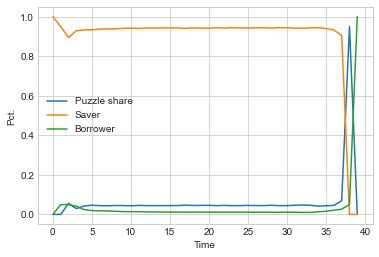

In [54]:
puzzle_share = np.zeros((par.T))
saver = np.zeros((par.T))
borrower = np.zeros((par.T))

for t in range(par.T):
    puzzle_share[t] += np.sum((sim.d[t,:] < 0.73) & (sim.d[t,:] > 0.01)) / len(sim.d[t,:])
    saver[t] += np.sum((sim.d[t,:] < 0.01)) / len(sim.d[t,:])
    borrower[t] += np.sum((sim.d[t,:] > 0.73)) / len(sim.d[t,:])


plt.plot(puzzle_share, label='Puzzle share')
plt.plot(saver, label='Saver')
plt.plot(borrower, label='Borrower')

plt.xlabel('Time')
plt.ylabel("Pct.")
plt.legend()
plt.show()


In [51]:
saver[20]

0.8346

In [52]:
puzzle_share[20]

0.114528